# <center>Chapter 4. Training Models</center> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = 2 * np.random.rand(100,1)

In [6]:
X.shape

(100, 1)

In [7]:
y = 4 + 3 * X + np.random.randn(100,1)

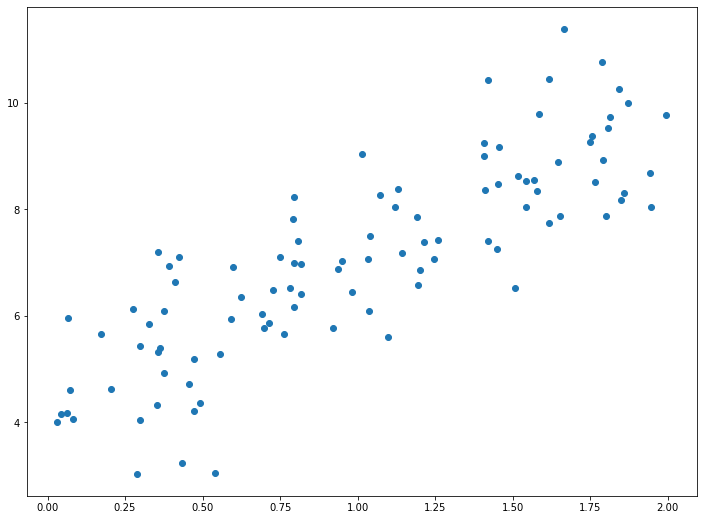

In [18]:
plt.figure(figsize=(12,9))
plt.scatter(x=X, y=y)

In [8]:
X_b = np.c_[np.ones((100,1)), X]

In [9]:
X_b.shape

(100, 2)

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.32542885],
       [2.72111751]])

In [12]:
X_new = np.array([[0], [2]])

In [15]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [16]:
y_pred = X_new_b.dot(theta_best)

In [17]:
y_pred

array([[4.32542885],
       [9.76766386]])

In [19]:
y_full = X_b.dot(theta_best)

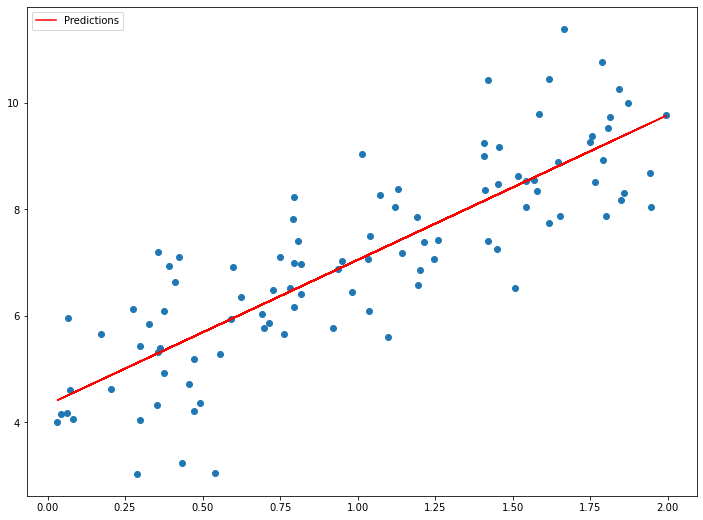

In [26]:
plt.figure(figsize=(12,9))
plt.scatter(x=X, y=y)

plt.plot(X, y_full, c='r', label='Predictions')
plt.legend(loc='upper left')

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X, y)

LinearRegression()

In [30]:
lin_reg.intercept_, lin_reg.coef_

(array([4.32542885]), array([[2.72111751]]))

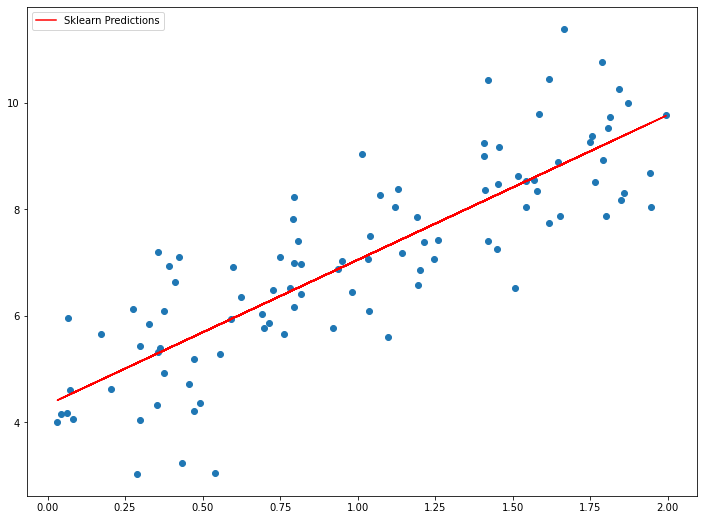

In [33]:
plt.figure(figsize=(12,9))
plt.scatter(x=X, y=y)

plt.plot(X, lin_reg.predict(X), c='r', label='Sklearn Predictions')
plt.legend(loc='upper left')

## Batch Gradient Descent 

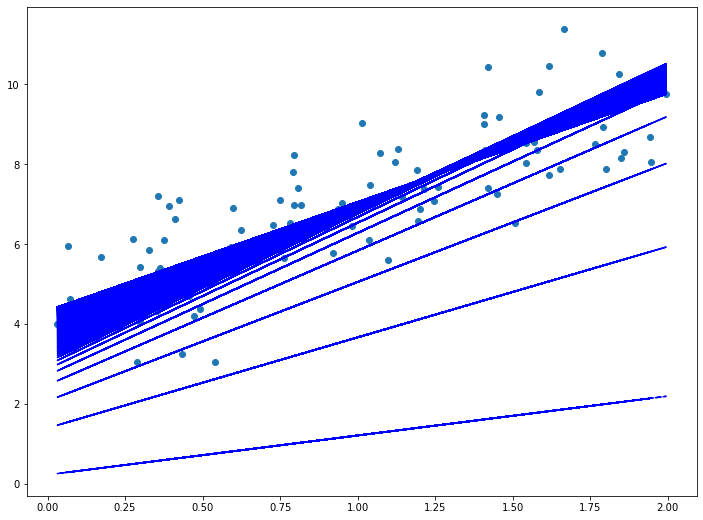

In [34]:
plt.figure(figsize=(12,9))
plt.scatter(x=X, y=y)

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

plt.plot(X, X_b.dot(theta), 'b--', label='Initiation')
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    plt.plot(X, X_b.dot(theta), 'b-',)
plt.show()

## Stochastic Gradient Descent 

In [35]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

In [36]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        

In [37]:
theta

array([[4.35640585],
       [2.71526591]])

### Stochastic gradient descent in sklearn 

In [38]:
from sklearn.linear_model import SGDRegressor

In [42]:
sgd_reg = SGDRegressor(max_iter=1000, tol=0.001, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [43]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.34693002]), array([2.73048243]))

## Polynomial regression 

In [44]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

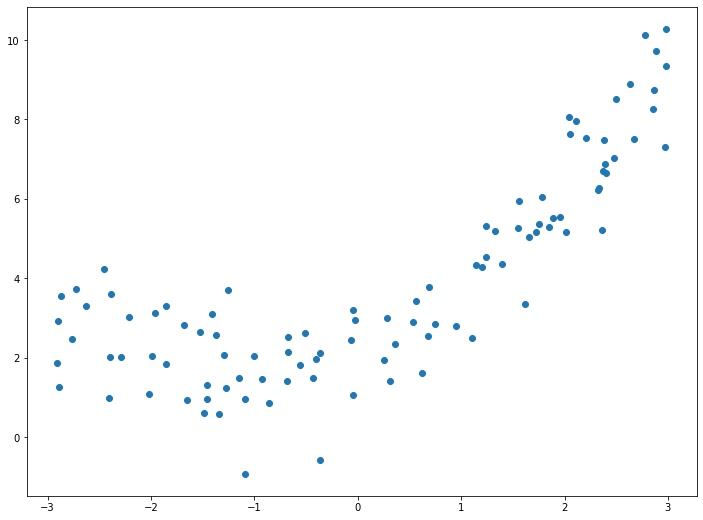

In [45]:
plt.figure(figsize=(12,9))
plt.scatter(X, y)

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [48]:
X_poly = poly_features.fit_transform(X)

In [49]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [50]:
lin_reg.intercept_, lin_reg.coef_

(array([2.16280481]), array([[1.01346107, 0.46451015]]))

In [52]:
y_final = lin_reg.predict(X_poly)

In [54]:
comb = np.c_[X, y_final]

In [60]:
X_f, y_f = comb[comb[:, 0].argsort()][:,0],comb[comb[:, 0].argsort()][:,1]

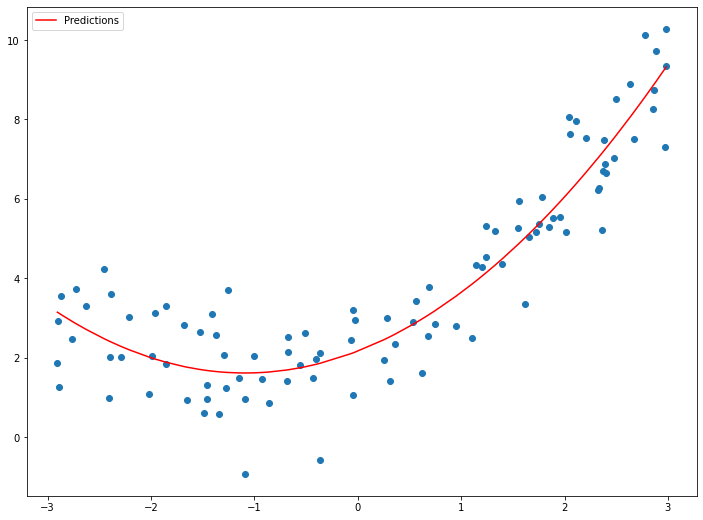

In [61]:
plt.figure(figsize=(12,9))
plt.scatter(X, y)

plt.plot(X_f, y_f, 'r', label='Predictions')
plt.legend(loc='upper left')

## Learning Curve 

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [65]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation')
    plt.legend()

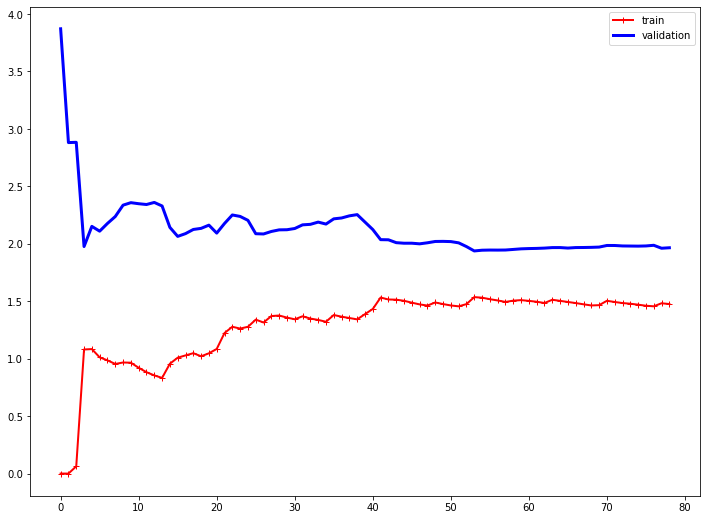

In [66]:
plt.figure(figsize=(12,9))
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False))
    , ('lin_reg', LinearRegression())
])

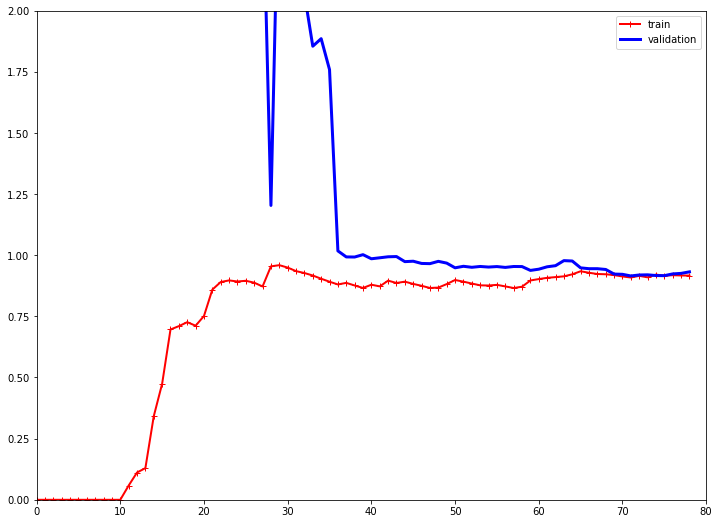

In [76]:
plt.figure(figsize=(12,9))
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2])
plt.show()

## Early Stopping 

In [77]:
from sklearn.base import clone

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
from sklearn.pipeline import make_pipeline

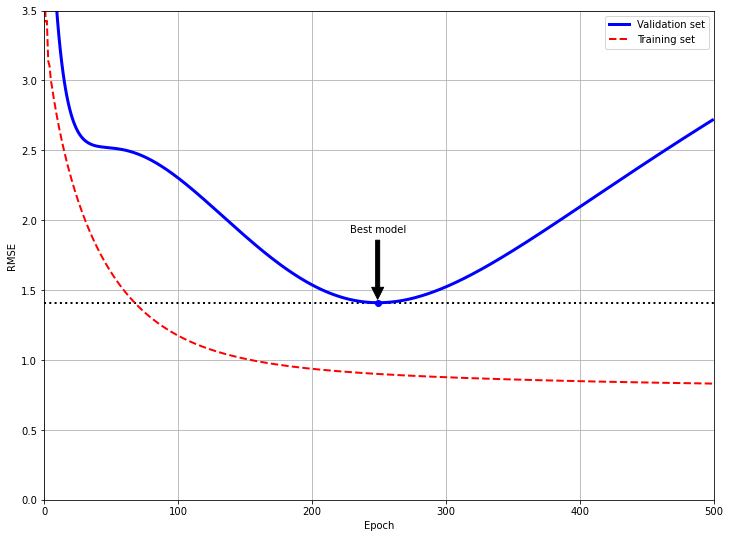

In [90]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(12, 9))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()